In [2]:
import sys
sys.path.append('../')  # Add the parent folder to the system path

from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from util import preprocess

data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC','CALC','MTRANS']

df_final = preprocess.one_hot_encode(data, columns_to_encode)

column_to_move = df_final.pop('NObeyesdad')

# Reinsert the column at the end
df_final['NObeyesdad'] = column_to_move

# Custom mapping for target class (obesity level)
feature_mapping = {'Insufficient_Weight': 0,'Normal_Weight': 1,'Overweight_Level_I': 2,'Overweight_Level_II': 3,'Obesity_Type_I': 4,'Obesity_Type_II': 5,'Obesity_Type_III': 6}
df_final['NObeyesdad'] = df_final['NObeyesdad'].map(feature_mapping)

# Features : X , Labels : y
X, y = preprocess.sep_column(df_final, "NObeyesdad")

# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=462)

Feature ranking:
1. Feature 'Weight': 0.45667499735279826
2. Feature 'Height': 0.22526521641864486
3. Feature 'Gender_Male': 0.1637440893017652
4. Feature 'Age': 0.046952871737292644
5. Feature 'CALC_no': 0.024472578720313245
6. Feature 'FAVC_yes': 0.021377006357816287
7. Feature 'FCVC': 0.014589399651726252
8. Feature 'CAEC_Always': 0.007112092782158015
9. Feature 'FAF': 0.005997245705330921
10. Feature 'NCP': 0.004513026314678412
11. Feature 'CH2O': 0.004376561449247447
12. Feature 'MTRANS_Automobile': 0.0038203103761374584
13. Feature 'TUE': 0.00311191277289447
14. Feature 'family_history_with_overweight_no': 0.0027295156735800984
15. Feature 'CAEC_Sometimes': 0.0026131995469697612
16. Feature 'MTRANS_Public_Transportation': 0.0024219646117682563
17. Feature 'CAEC_Frequently': 0.0017372882114030245
18. Feature 'Gender_Female': 0.0015343401261999547
19. Feature 'FAVC_no': 0.0013839797781532892
20. Feature 'MTRANS_Bike': 0.0012935989636649586
21. Feature 'MTRANS_Motorbike': 0.00121098

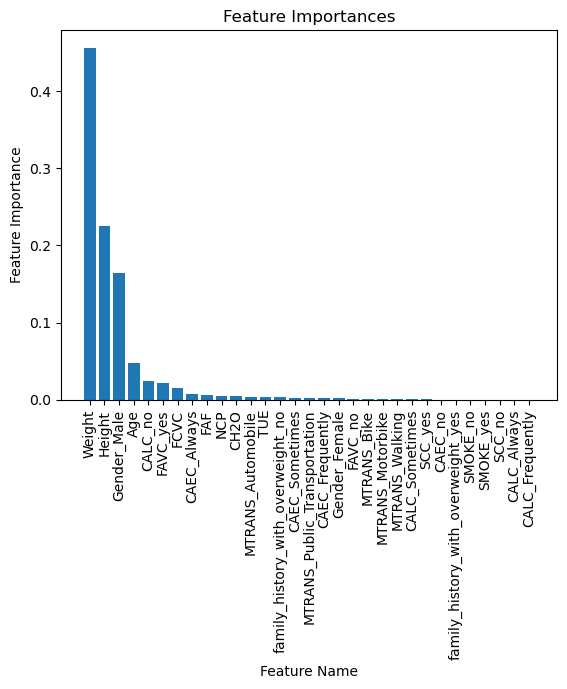

In [3]:
clf = DecisionTreeClassifier()

# Train the decision tree model
clf.fit(X_train, y_train)

# Get feature importances and feature names
importances = clf.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature '{feature_names[indices[f]]}': {importances[indices[f]]}")

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.show()